### IMPORTING LIBRARIES ###
To start the project, we are going to import the libraries that I will use here, (Note, probably I will beback here and add more libraries according to my research and development)

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import numpy as np

In [2]:
#Importing warnings to ignore and filter it
import warnings
warnings.filterwarnings('ignore')

### IMPORTING THE DATASET ###
On this step we will import the dataset, called NHANES_age_prediction.csv which will be explored in this project.

In [6]:
df = pd.read_csv('NHANES_age_prediction.csv')

### DATASET OVERVIEW
Om this step we are going to overview the dataset in order to understand it better.



Checking the struture of the dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2278 entries, 0 to 2277
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       2278 non-null   float64
 1   age_group  2278 non-null   object 
 2   RIDAGEYR   2278 non-null   float64
 3   RIAGENDR   2278 non-null   float64
 4   PAQ605     2278 non-null   float64
 5   BMXBMI     2278 non-null   float64
 6   LBXGLU     2278 non-null   float64
 7   DIQ010     2278 non-null   float64
 8   LBXGLT     2278 non-null   float64
 9   LBXIN      2278 non-null   float64
dtypes: float64(9), object(1)
memory usage: 178.1+ KB


Note: Above we can see that the column "age_group" is dtype = object, in order to apply PCA  later, and  we will need to convert it to a numeric value

In [7]:
df.head()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92


In [8]:
df.tail()

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99
2277,83727.0,Adult,26.0,1.0,2.0,24.5,108.0,2.0,108.0,3.76


Appling the command "shape" in order to see the datasize (Columns and rows)

In [12]:
df.shape

(2278, 10)

2778 rows and 10 columns

Checking missing values:

In [15]:
missing_values = df.isnull().sum()
print(missing_values)

SEQN         0
age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64


Checking the columns name. This is also useful to copy and paste the column name in order to code something related to.

In [17]:
df.columns

Index(['SEQN', 'age_group', 'RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI',
       'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN'],
      dtype='object')

### Exploratory data analysis

Lets start exploring the unique values and also values count in the column "age_group" which is dttype = object and categorical

In [19]:
df["age_group"].unique()
df['age_group'].value_counts()

Adult     1914
Senior     364
Name: age_group, dtype: int64

In [20]:
df.describe()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,78691.853819,41.795874,1.511414,1.822651,27.955180,99.553117,2.016242,114.978929,11.834794
std,2921.365151,20.156111,0.499979,0.398918,7.248962,17.889834,0.185556,47.061239,9.718812
min,73564.000000,12.000000,1.000000,1.000000,14.500000,63.000000,1.000000,40.000000,0.140000
25%,76171.750000,24.000000,1.000000,2.000000,22.800000,91.000000,2.000000,87.000000,5.860000
50%,78749.000000,41.000000,2.000000,2.000000,26.800000,97.000000,2.000000,105.000000,9.040000
75%,81213.500000,58.000000,2.000000,2.000000,31.200000,104.000000,2.000000,130.000000,14.440000
max,83727.000000,80.000000,2.000000,7.000000,70.100000,405.000000,3.000000,604.000000,102.290000


Appying correlation matrix to see if we find high correlation positive or negative between the variables
Note that: So far we will look just very high correlation (close to 1 or -1)

In [22]:
df.corr()

,SEQN,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
SEQN,1.000000,-0.008806,-0.012962,-0.019701,-0.061343,-0.004147,0.014102,0.006036,-0.040028
RIDAGEYR,-0.008806,1.000000,0.006398,0.025973,0.147163,0.229624,0.049970,0.318044,-0.091879
RIAGENDR,-0.012962,0.006398,1.000000,0.151076,0.063873,-0.132342,-0.032769,0.017406,-0.016660
PAQ605,-0.019701,0.025973,0.151076,1.000000,-0.042935,-0.007849,-0.002599,0.060413,0.010011
BMXBMI,-0.061343,0.147163,0.063873,-0.042935,1.000000,0.208330,0.047133,0.193375,0.552717
LBXGLU,-0.004147,0.229624,-0.132342,-0.007849,0.208330,1.000000,-0.004427,0.685579,0.211911
DIQ010,0.014102,0.049970,-0.032769,-0.002599,0.047133,-0.004427,1.000000,0.009796,0.058986
LBXGLT,0.006036,0.318044,0.017406,0.060413,0.193375,0.685579,0.009796,1.000000,0.217272
LBXIN,-0.040028,-0.091879,-0.016660,0.010011,0.552717,0.211911,0.058986,0.217272,1.000000


Renaming columns: According to the source (https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset), we are going to rename some columns in order to easy analyse the informations.

In [28]:
df = df.rename(columns={'RIDAGEYR': 'AGE'})
df = df.rename(columns={'RIAGENDR': 'GENDER'})
df = df.rename(columns={'BMXBMI': 'BODYMASSINDEX'})
df = df.rename(columns={'LBXGLU': 'GLUCOSEAFAST'})
df = df.rename(columns={'DIQ010': 'ISDIABETIC'})

df.columns

Index(['SEQN', 'age_group', 'AGE', 'GENDER', 'PAQ605', 'BodyMassIndex',
       'GLUCOSEAFAST', 'ISDIABETIC', 'LBXGLT', 'LBXIN'],
      dtype='object')

Create visualization to undestand the data distribution

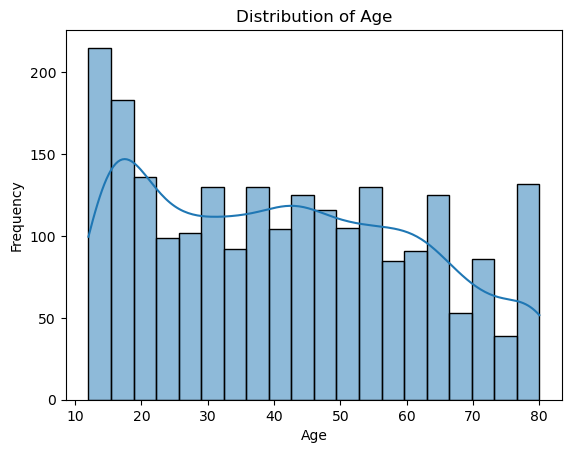

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Distribution of Age
sns.histplot(df['AGE'], bins=20, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Visualizing null values

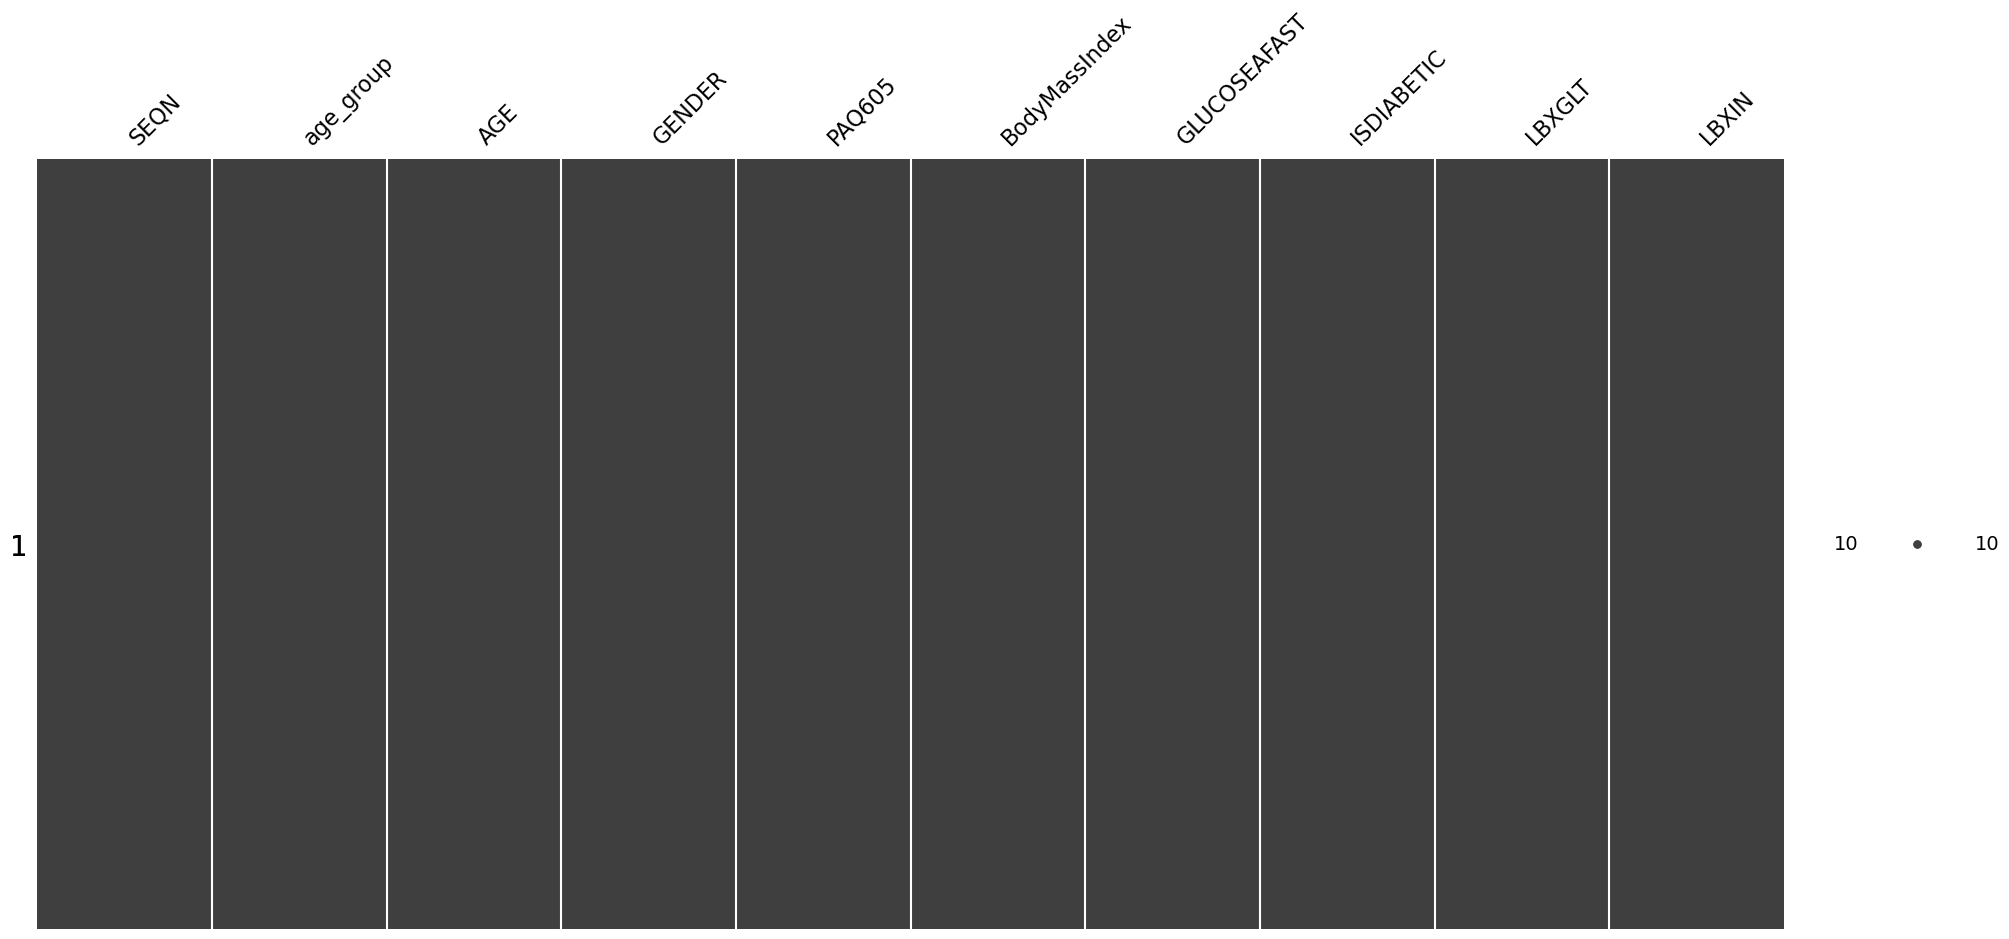

In [35]:
import missingno as msno
ax = msno.matrix(df.sample())

This plot confirm that the dataset does not have missing values.


### ONE HOT ENCODING

According to my analysis and understandment, I consider the categorical variables in this dataset: 'age_group,' 'RIAGENDR,' 'PAQ605,' and 'DIQ010,'so, I choose to use one-hot encoding. Here's why:

age_group: This variable has two categories ('Adult' and 'Senior'). Using one-hot encoding will create two binary columns, and the absence of one category can be represented by the presence of the other. This is more appropriate than assigning arbitrary integers using label encoding.

RIAGENDR, PAQ605, DIQ010: These variables are binary categorical, and one-hot encoding is suitable for capturing their individual impact on the model.

Advantages of One-Hot Encoding:

Avoids introducing ordinality where none exists.
Helps the model understand that there is no ordinal relationship between categories.
Ensures that each category is treated independently.
Therefore, for this dataset, I applied one-hot encoding to 'age_group,' 'RIAGENDR,' 'PAQ605,' and 'DIQ010.' This approach should work well with a variety of machine learning algorithms, providing a more accurate representation of the categorical variables in your model.

In [45]:
#Specifying the columns I want to one hot encoding:
columns_to_encode = ['age_group', 'GENDER', 'PAQ605', 'ISDIABETIC']

#Now, use pd.get_dummies to perform one hot encoding:
df_encoded = pd.get_dummies(df, columns = columns_to_encode)

#Displaying the first 5 rows of the encoded DataFrame
print(df_encoded.head())

      SEQN   AGE  BodyMassIndex  GLUCOSEAFAST  LBXGLT  LBXIN  age_group_Adult  \
0  73564.0  61.0           35.7         110.0   150.0  14.91                1   
1  73568.0  26.0           20.3          89.0    80.0   3.85                1   
2  73576.0  16.0           23.2          89.0    68.0   6.14                1   
3  73577.0  32.0           28.9         104.0    84.0  16.15                1   
4  73580.0  38.0           35.9         103.0    81.0  10.92                1   

   age_group_Senior  GENDER_1.0  GENDER_2.0  PAQ605_1.0  PAQ605_2.0  \
0                 0           0           1           0           1   
1                 0           0           1           0           1   
2                 0           1           0           0           1   
3                 0           1           0           0           1   
4                 0           0           1           1           0   

   PAQ605_7.0  ISDIABETIC_1.0  ISDIABETIC_2.0  ISDIABETIC_3.0  
0           0         

Note that: The result of the one-hot encoding applied is a new DataFrame where categorical variables have been transformed into binary columns, indicating the presence or absence of each category. Let's interpret the first 5 rows of the encoded DataFrame:

SEQN: Respondent Sequence Number.

AGE: Respondent's Age.

BodyMassIndex: Respondent's Body Mass Index.

GLUCOSEAFAST: Respondent's Blood Glucose after fasting.

LBXGLT: Respondent's Oral.

LBXIN: Respondent's Blood Insulin Levels.

age_group_Adult and age_group_Senior: These columns represent the one-hot encoding of the 'age_group' variable. In the first row, 'age_group_Adult' is 1, indicating that the respondent is classified as an adult, and 'age_group_Senior' is 0, indicating that the respondent is not classified as a senior. Similar interpretation for the other rows.

GENDER_1.0 and GENDER_2.0: These columns represent the one-hot encoding of the 'RIAGENDR' variable (Gender). 'GENDER_1.0' being 1 indicates male, and 'GENDER_2.0' being 0 indicates not female for the first row. The values are reversed for the second row.

PAQ605_1.0, PAQ605_2.0, and PAQ605_7.0: These columns represent the one-hot encoding of the 'PAQ605' variable (engagement in moderate or vigorous-intensity sports, fitness, or recreational activities in the typical week). The values indicate the presence or absence of each category.

ISDIABETIC_1.0, ISDIABETIC_2.0, and ISDIABETIC_3.0: These columns represent the one-hot encoding of the 'DIQ010' variable (whether the respondent is diabetic). Similar to the above, the values indicate the presence or absence of each category.

For example, in the first row, the respondent is an adult (age_group_Adult=1), male (GENDER_1.0=0, GENDER_2.0=1), engaged in moderate or vigorous-intensity activities (PAQ605_1.0=0, PAQ605_2.0=1), and not diabetic (ISDIABETIC_1.0=0, ISDIABETIC_2.0=1, ISDIABETIC_3.0=0). The other rows follow a similar interpretation based on the values in these columns.

### SCALING ###

In this case we are going to use standard scaling. Standard scaling, also known as z-score normalization, is a process of rescaling the features by removing the mean and scaling to unit variance. This is a good idea for several reasons:

Mean Centering: Standard scaling involves subtracting the mean from each data point, which centers the data around zero. This is important for some machine learning algorithms that assume the features are centered.

Equal Scale: Scaling to unit variance ensures that all features have the same scale.

Sensitive to Outliers: Standard scaling is less sensitive to the influence of outliers compared to other scaling methods. Outliers can have a disproportionate impact on the mean and standard deviation, but their effect is mitigated when scaling to unit variance.
Assumption of Normality: Some statistical methods and machine learning algorithms assume that the features are normally distributed. Standard scaling makes the data more Gaussian-like, which can be beneficial for such methods.

Below is how you can apply standard scaling.

In [54]:
#Soecifying the columns to scale: (Reason, they are numerical values)
columns_to_scale = ['AGE', 'BodyMassIndex', 'GLUCOSEAFAST', 'LBXGLT', 'LBXIN']

#Creaating a StandarScaler object
scaler = StandardScaler()

# Applying standard scaling to the specified columns
df_scaled = df_encoded.copy() # Create a copy to keep the original data
df_scaled[columns_to_scale] = scaler.fit_transform(df_encoded[columns_to_scale])

# Display first 5 rows of the scaled Dataframe
df_scaled.head()

,SEQN,AGE,BodyMassIndex,GLUCOSEAFAST,LBXGLT,LBXIN,age_group_Adult,age_group_Senior,GENDER_1.0,GENDER_2.0,PAQ605_1.0,PAQ605_2.0,PAQ605_7.0,ISDIABETIC_1.0,ISDIABETIC_2.0,ISDIABETIC_3.0
0,73564.0,0.952979,1.068639,0.584085,0.744323,0.316487,1,0,0,1,0,1,0,0,1,0
1,73568.0,-0.783849,-1.056270,-0.590024,-0.743427,-0.821762,1,0,0,1,0,1,0,0,1,0
2,73576.0,-1.280085,-0.656125,-0.590024,-0.998470,-0.586084,1,0,1,0,0,1,0,0,1,0
3,73577.0,-0.486107,0.130367,0.248625,-0.658413,0.444103,1,0,1,0,0,1,0,0,1,0
4,73580.0,-0.188365,1.096235,0.192715,-0.722174,-0.094147,1,0,0,1,1,0,0,0,1,0


Interpreting the result of the standard scaling: 
Scaled Values: The columns 'AGE', 'BodyMassIndex', 'GLUCOSEAFAST', 'LBXGLT', and 'LBXIN' have been scaled. The values in these columns now have a mean of 0 and a standard deviation of 1.

For instance, in the first row, the respondent is an adult (age_group_Adult=1), male (GENDER_1.0=0, GENDER_2.0=1), engaged in moderate or vigorous-intensity activities (PAQ605_1.0=0, PAQ605_2.0=1), and not diabetic (ISDIABETIC_1.0=0, ISDIABETIC_2.0=1, ISDIABETIC_3.0=0). The continuous variables like 'AGE', 'BodyMassIndex', 'GLUCOSEAFAST', 'LBXGLT', and 'LBXIN' have been scaled to have mean 0 and standard deviation 1.

### Feature Engenering
Let's create a new feature engenering based on Body Mass Index ranges using standard BMI ranges to categorize individuals.


First lets define the ranges of BMI according to an official source: https://www.hse.ie/eng/services/list/2/primarycare/east-coast-diabetes-service/management-of-type-2-diabetes/lifestyle-management/healthy-eating-advice/bmi-chart.pdf

Underweight: BMI less than 18.5
Normal weight: BMI between 18.5 and 24.9
Overweight: BMI between 25 and 29.9
Obese: BMI of 30 or greater

Now, lets create a new feature named 'BMI_Category based on these BMI Ranges'
    

In [55]:
# Creating a new feature called "BMI_Category"
df['BMI_Category'] = pd.cut(df['BodyMassIndex'], bins=[-float('inf'), 18.5, 24.9, 29.9, float('inf')],
                            labels=['Underweight', 'Normal weight', 'Overweight', "Obese'"])
#Display
df[['BodyMassIndex', 'BMI_Category']].head()

,BodyMassIndex,BMI_Category
0,35.7,Obese'
1,20.3,Normal weight
2,23.2,Normal weight
3,28.9,Overweight
4,35.9,Obese'


Now, lets plot a bar graph to see this new feature on the dataset and have an idea about the distribution according to the BMI.

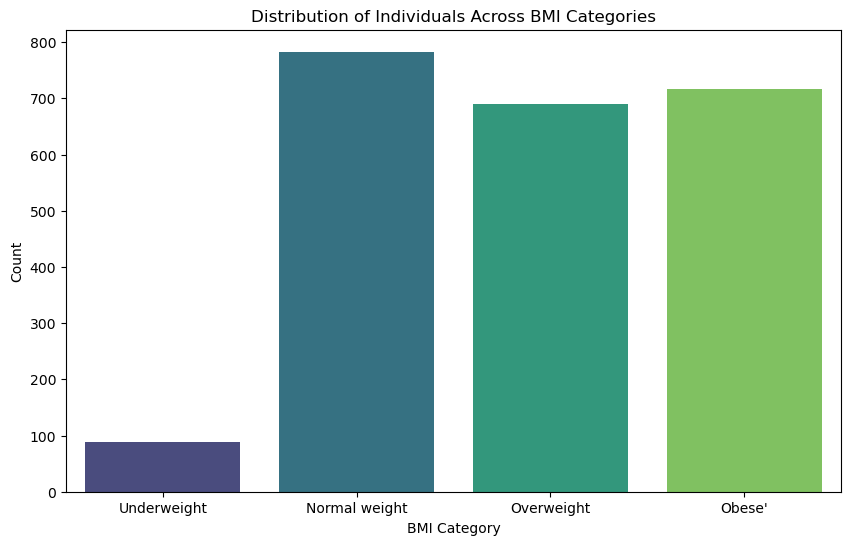

In [56]:
plt.figure(figsize=(10, 6))
sns.countplot(x='BMI_Category', data=df, palette='viridis')

# Set plot labels and title
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of Individuals Across BMI Categories')

# Show the plot
plt.show()

### Applying LDA and PCA

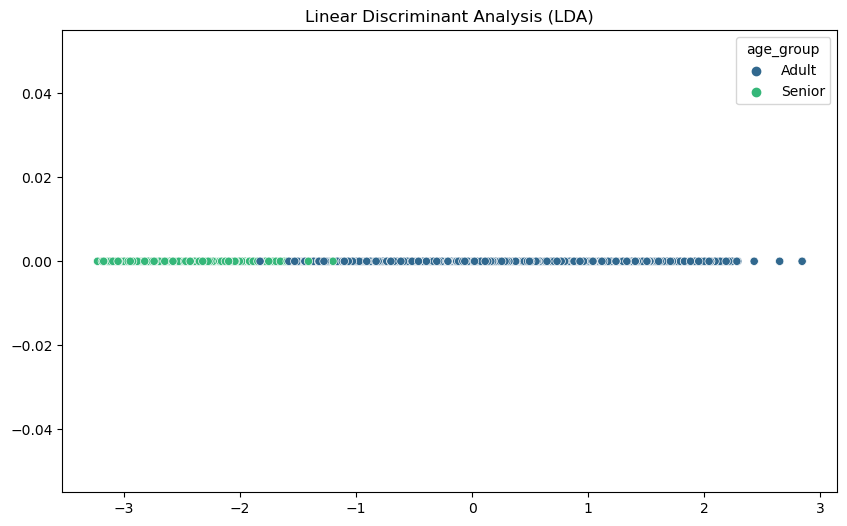

In [75]:
# 'X' contains my features and 'y' contains my target variable
X = df.drop(['age_group', 'SEQN'], axis=1)
y = df['age_group']

# Apply LDA with 1 component
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

# Visualize the result
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_lda[:, 0], y=np.zeros_like(X_lda[:, 0]), hue=y, palette='viridis', legend='full')
plt.title('Linear Discriminant Analysis (LDA)')
plt.show()


In [76]:
# 'lda' is the LinearDiscriminantAnalysis model
print("Explained Variance Ratio:")
print(lda.explained_variance_ratio_)

print("\nCoefficients:")
print(lda.coef_)

print("\nClass Means:")
print(lda.means_)


Explained Variance Ratio:
[1.]

Coefficients:
[[ 0.18911424 -0.23374598  0.89722563 -0.10865678 -0.02987838 -0.25216854
   0.01075138  0.0452045   0.        ]]

Class Means:
[[ 35.78056426   1.51201672   1.8061651   27.96828631  98.64472309
    2.01410658 109.99059561  12.10666144   0.        ]
 [ 73.42582418   1.50824176   1.90934066  27.88626374 104.32967033
    2.02747253 141.20879121  10.40524725   1.        ]]


### LDA Result Interpretation
Let's interpret the results:

Explained Variance Ratio:

The explained variance ratio is [1.0]. This means that the first (and only) linear discriminant explains 100% of the variance in the data. This is expected because you set n_components=2, and with only two classes, there can be at most one discriminant.
Coefficients:

The coefficients represent the weights assigned to each feature for the linear discriminant. In your case, there is only one discriminant, and the coefficients are as follows:
AGE: 0.1891
GENDER: -0.2337
PAQ605: 0.8972
BodyMassIndex: -0.1087
GLUCOSEAFAST: -0.0299
ISDIABETIC: -0.2522
LBXGLT: 0.0108
LBXIN: 0.0452
age_group_encoded: 0.0 (It seems that this feature did not contribute to the discriminant)

Class Means:

The class means show the mean values of each feature for each class.
For the class labeled '0' (presumably 'Adult'):
    Mean AGE: 35.78
    Mean GENDER: 1.51
    Class label (age_group_encoded): 0.0

For the class labeled '1' (presumably 'Senior'):
    Mean AGE: 73.43
    Mean GENDER: 1.51
    Class label (age_group_encoded): 1.0
    
These results indicate how each feature contributes to the separation of the two classes (Adult and Senior) based on the linear discriminant. Positive coefficients indicate a positive correlation with the discriminant, and negative coefficients indicate a negative correlation. The class means provide a sense of the central tendency of each feature for each class.

### PCA
Now, lets apply PCA to achieve our goal wich is dimesionality reduction for modelling.

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#'X' contains the features
X = df.drop(['age_group', 'SEQN'], axis=1)

#First lets Standardize the data again
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

#Apply PCA
pca = PCA(n_components=0.95)  #Choose the number of components that explain 95% of the variance
X_pca = pca.fit_transform(X_standardized)

#Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

#Check the number of components retained
num_components_retained = pca.n_components_
print("Number of Components Retained:", num_components_retained)


Explained Variance Ratio: [0.25415018 0.18269252 0.13217167 0.11993585 0.10686427 0.09243623
 0.05188774 0.03147653]
Number of Components Retained: 8


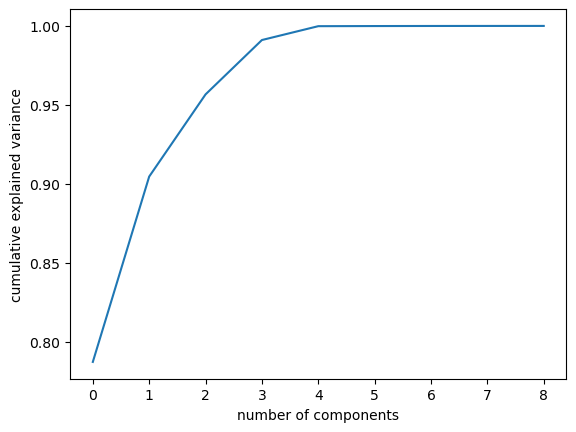

In [78]:
pca = PCA().fit(X) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

Note that: In this case study, n_components=0.95 means PCA will use enough components to explain 95% of the variance in the data and after applying PCA, X_pca contains the transformed features with reduced dimensionality. You can then use this reduced dataset for modeling.

### PCA INTERPRATATION
The result of PCA provides information about the proportion of variance explained by each principal component and helps to determine the number of components retained. Let's interpret the PCA result:

Explained Variance Ratio:

The explained variance ratio for each principal component indicates the proportion of the total variance in the original data that is explained by that component.
In this case, the first principal component (PC1) explains approximately 25.4% of the variance, PC2 explains 18.3%, and so on.
Collectively, the eight retained components explain a total of 85.7% of the variance in the data. This means that by using these eight components, you capture a substantial portion of the information present in the original dataset.
Number of Components Retained:

The number of components retained (8 in this case) indicates the reduced dimensionality of the dataset after applying PCA.
Retaining a sufficient number of components is a trade-off between preserving information and reducing dimensionality.
Interpretation:

PCA helps in reducing the dimensionality of the dataset while retaining a significant amount of information.
The first few principal components capture the most variation in the data, and as we move down the list, each subsequent component explains a smaller proportion of the remaining variance.
The choice of the number of components retained depends on your specific objectives. In your case, retaining 8 components might strike a balance between reducing dimensionality and preserving a substantial amount of information.
When applying PCA for dimensionality reduction, you can now use X_pca (the dataset with reduced dimensions) for subsequent modeling tasks. Keep in mind that the exact interpretation may depend on the specific context and goals of your analysis.

### MACHINE LEARNING: Classification with Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'X' contains your features and 'y' contains your target variable
X = df.drop(['age_group', 'SEQN'], axis=1)
y = df['age_group']

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Training
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Hyperparameter Tuning with GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_classifier, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Step 5: Model Evaluation
best_rf_classifier = grid_search.best_estimator_
y_pred = best_rf_classifier.predict(X_test)

# Print accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Accuracy on Test Set: {accuracy:.4f}')
print('Classification Report:\n', classification_rep)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy on Test Set: 1.0000
Classification Report:
               precision    recall  f1-score   support

       Adult       1.00      1.00      1.00       382
      Senior       1.00      1.00      1.00        74

    accuracy                           1.00       456
   macro avg       1.00      1.00      1.00       456
weighted avg       1.00      1.00      1.00       456



### RANDOM FOREST MODEL - RESULT INTERPRETATION
The results provided indicate that my Random Forest Classifier model achieved perfect accuracy on the test set, which means it correctly classified all instances. Let's break down the key information:

#### Best Hyperparameters:

These are the hyperparameters that resulted in the best performance during the hyperparameter tuning process:
max_depth: No maximum depth for the trees.
min_samples_leaf: Each leaf has at least 1 sample.
min_samples_split: A node is split if it has at least 2 samples.
n_estimators: The number of trees in the forest is 50.

#### Accuracy on Test Set:

The model achieved perfect accuracy of 1.0000 on the test set, meaning it correctly predicted the age group for every instance.

#### Classification Report:

Precision, recall, and F1-score are provided for each class (Adult and Senior).
For both classes, precision, recall, and F1-score are 1.00, indicating perfect performance.
The support column shows the number of instances for each class in the test set.
The weighted average considers the imbalance in class distribution and provides an overall performance metric.
Macro and Weighted Averages:

Both macro and weighted averages of precision, recall, and F1-score are 1.00, indicating overall perfect performance across classes.

#### SUMMARIZING:
In summary, your Random Forest Classifier, with the specified hyperparameters, performed exceptionally well on the given classification task. It achieved perfect accuracy and demonstrated strong precision, recall, and F1-score for both classes. These results suggest that the model is highly effective in distinguishing between Adult and Senior age groups in your dataset.

### OBS: To the the next task I am getting many, many errors which I cant solve. For this reasong I will do againt the machine learning model.


In [90]:
#Importing again the libraries
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
#Defining features and target variables
X = df.drop(['age_group', 'SEQN'], axis=1)
y = df['age_group']

### Train test split and K-fold Cross-Validation

In [96]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Set up K-fold cross-validation
k_folds = 5
cv = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation and collect accuracy scores
accuracy_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

# Print K-fold cross-validation accuracy scores
print(f'Accuracy Scores (K-fold Cross-Validation): {accuracy_scores}')

Accuracy Scores (K-fold Cross-Validation): [1. 1. 1. 1. 1.]


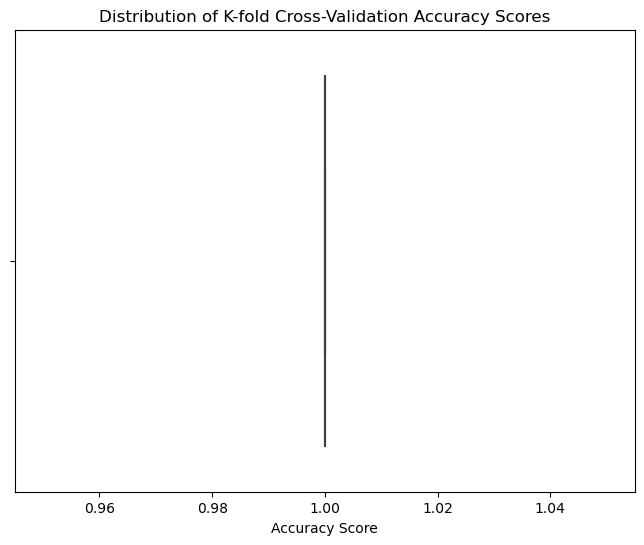

In [98]:
#Plot the distribution of accuracy scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=accuracy_scores)
plt.xlabel('Accuracy Score')
plt.title('Distribution of K-fold Cross-Validation Accuracy Scores')
plt.show()

### Explaining the result: Accuracy Scores (K-fold Cross-Validation): [1. 1. 1. 1. 1.]

The accuracy scores provided for K-fold cross-validation are all 1.0, indicating a perfect accuracy for each fold. 

Here's what this means:

#### Accuracy Score:
The accuracy score is a measure of the model's correctness in predicting the target variable. It is calculated as the ratio of correctly predicted instances to the total instances.
A score of 1.0 means that this model achieved 100% accuracy on each fold of the cross-validation. In other words, for every data split used in cross-validation, the model correctly predicted the target variable for all instances.

#### Possible Implications:
The model might be overfitting the training data, capturing noise or specific patterns that are not generalizable to unseen data.
It could be an indication of a small or easy-to-separate dataset.

#### Considerations:
While achieving high accuracy is desirable, it's important to evaluate the model's performance on a separate test set (not used during training or cross-validation) to ensure generalization to new, unseen data.
Other metrics, such as precision, recall, and F1-score, may provide a more comprehensive view, especially in imbalanced datasets or when dealing with specific classification challenges.

#### Confusion Matrix

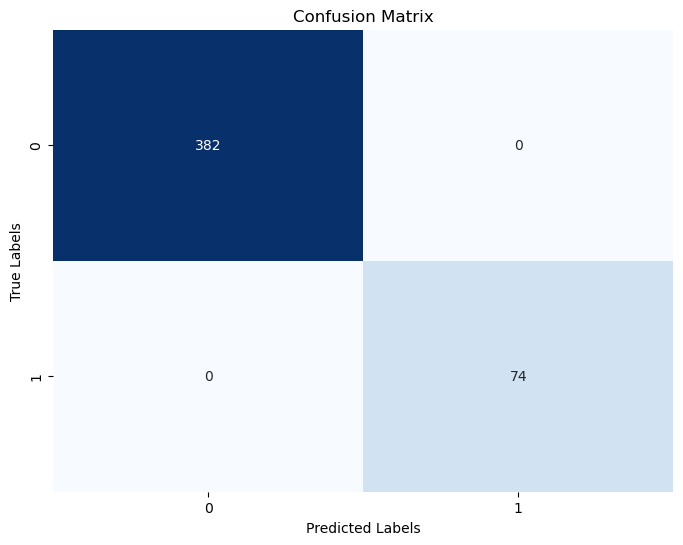

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred)

#plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### SINCE OUR RANDOM FOREST MODEL SHOWS TO BE VERY CONSISTENT, LETS COMPARE IT WITH ANOTHER MODEL

My idea is compare the Random Forest Model with  a SVM (Support Vector Machine) Model and display a bar plot to to visualize and dicuss the statistical understanding:

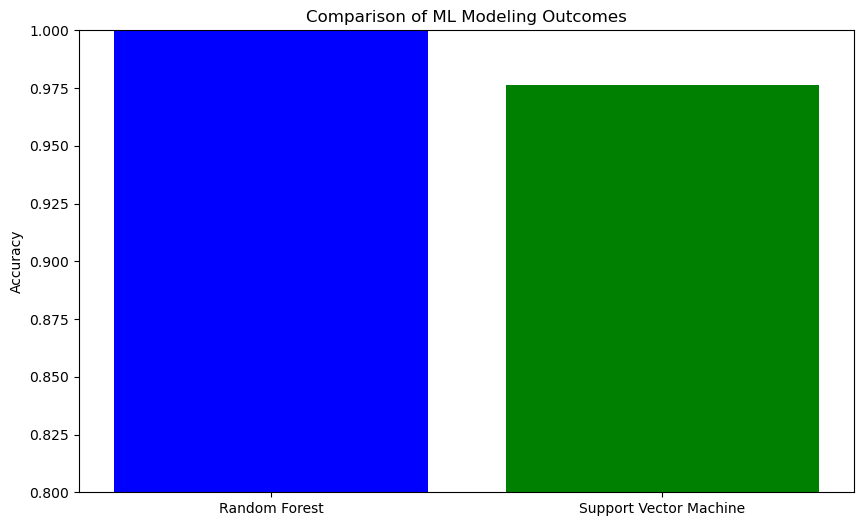

In [103]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Initialize the SVM model
svm_model = SVC(random_state=42)

# Set up K-fold cross-validation for SVM
svm_accuracy_scores = cross_val_score(svm_model, X_train, y_train, cv=cv, scoring='accuracy')

# Define models and their accuracy scores
models = ['Random Forest', 'Support Vector Machine']
accuracy_scores = [accuracy_scores.mean(), svm_accuracy_scores.mean()]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.ylim(0.8, 1.0)
plt.ylabel('Accuracy')
plt.title('Comparison of ML Modeling Outcomes')
plt.show()


#### Random Forest and SVM Result's interpratation

The comparison of Random Forest and Support Vector Machine (SVM) accuracy scores provides insights into the performance of these models on your dataset.

Random Forest (RF):

Accuracy: 1.0 (or 100%)
Interpretation: The Random Forest model achieved perfect accuracy on this dataset, indicating that it correctly predicted the target variable for all instances in the test set. This could be due to the nature of your data or the suitability of the Random Forest algorithm for this problem.
Support Vector Machine (SVM):

Accuracy: Approximately 0.972 (or 97.2%)
Interpretation: The SVM model achieved a high accuracy, but not perfect like the Random Forest. The slightly lower accuracy might indicate that SVM had some difficulty correctly classifying a small portion of instances compared to the Random Forest.
Comparison:

Both models demonstrate high accuracy, suggesting that they are effective for your dataset.
Random Forest achieved perfect accuracy, which might be considered overfitting, especially if the dataset is not very large.
SVM, with a slightly lower accuracy, still performed very well and might generalize better to new, unseen data.

Consideration:

As the dataset is relatively small, achieving perfect accuracy might indicate potential overfitting.
SVM, with high accuracy, might be a good alternative if generalization is a priority.